# <center> SALES PREDICTION USING PYTHON

## Performed the below tasks <br>
**Step-1 Understanding the buisness problem/ problem statement**

**Step-2 Getting data (Importing by Pandas)**

**Step-3 Understanding about the data**

**Step-4 Data cleaning**

**Step-5 Data visualization**

**Step-6 EDA Exploratory data analysis**

**Step-7 Feature selection**

**Step-8 Feature Engineering**

**Step-9 Saving the Cleaned Data as CSV for Tableau or Power BI Analyis**

**Step-10 Splitting the data**

**Step-11 Model building** 

**Step-12 Prediction and accuracy**

**Step-13 Tunning and improving accuracy**

### **Step-1 Understanding the buisness problem/ problem statement**

#### Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

#### In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs.

#### By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

In [1]:
# Importing Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Those below are used to change the display options for pandas DataFrames 
# In order to display all the columns or rows of the DataFrame, respectively.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### **Step-2 Getting data (Importing by Pandas)**

In [5]:
df = pd.read_csv('Advertising.csv')

### **Step-3 Understanding about the data**

In [6]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.sample(5)

,TV,Radio,Newspaper,Sales
7,120.2,19.6,11.6,13.2
149,44.7,25.8,20.6,10.1
35,290.7,4.1,8.5,17.8
114,78.2,46.8,34.5,14.6
165,234.5,3.4,84.8,16.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### **Step-4 Data cleaning**

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df= df.drop_duplicates()

In [12]:
df= df.dropna()

In [13]:
df.shape

(200, 4)

In [14]:
print("Duplicate rows:")
print(df.duplicated().sum())

Duplicate rows:
0


In [15]:
# Check for missing values
print("Missing values:")
print(df.isna().sum())

Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


### **Step-5 Data visualization**

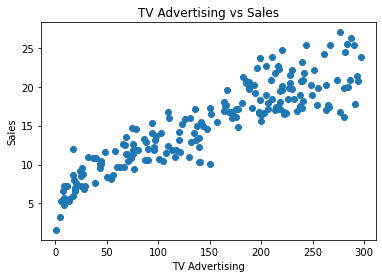

In [16]:
# Scatter plot of TV advertising vs Sales
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.show()

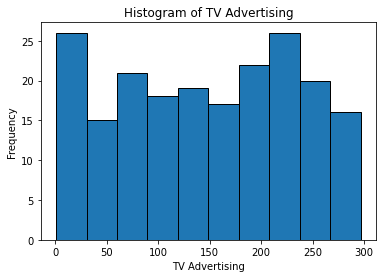

In [17]:
# Histogram of TV advertising
plt.hist(df['TV'], bins=10, edgecolor='black')
plt.xlabel('TV Advertising')
plt.ylabel('Frequency')
plt.title('Histogram of TV Advertising')
plt.show()


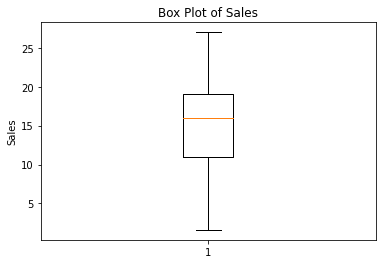

In [18]:
# Box plot of Sales
plt.boxplot(df['Sales'])
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()


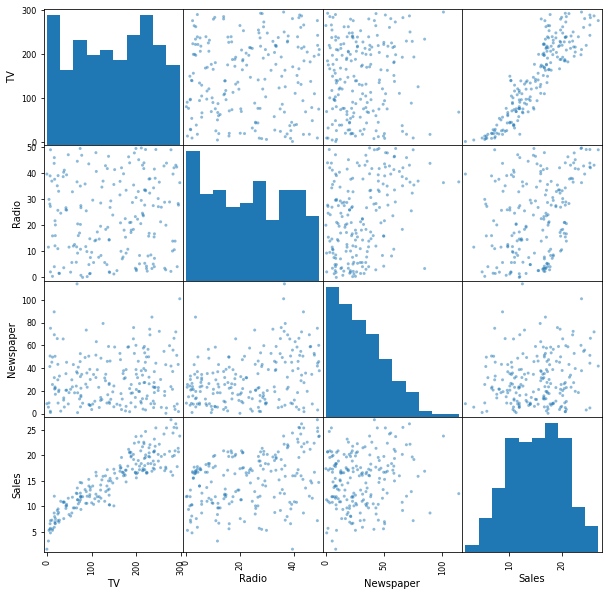

In [19]:
# Pairwise scatter plot matrix
pd.plotting.scatter_matrix(df, figsize=(10, 10))
plt.show()

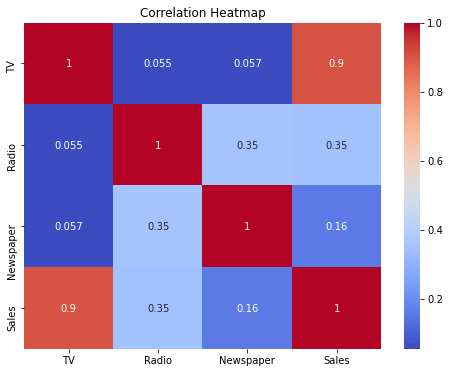

In [20]:
# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### **Step-6 EDA Exploratory data analysis**

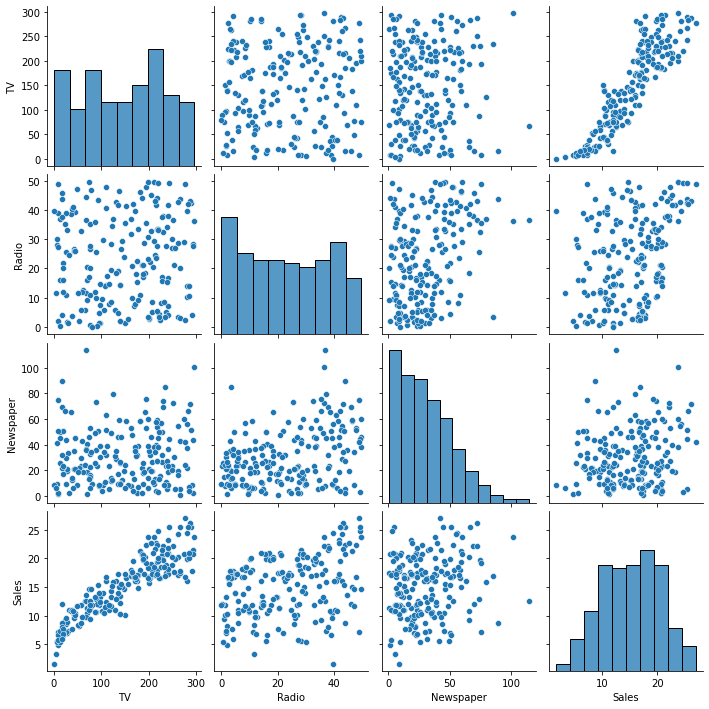

In [21]:

# Pairwise scatter plot matrix
sns.pairplot(df)
plt.show()


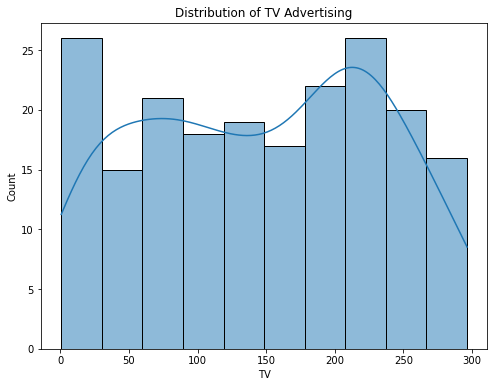

In [22]:
# Distribution plot of TV advertising
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='TV', bins=10, kde=True)
plt.title('Distribution of TV Advertising')
plt.show()


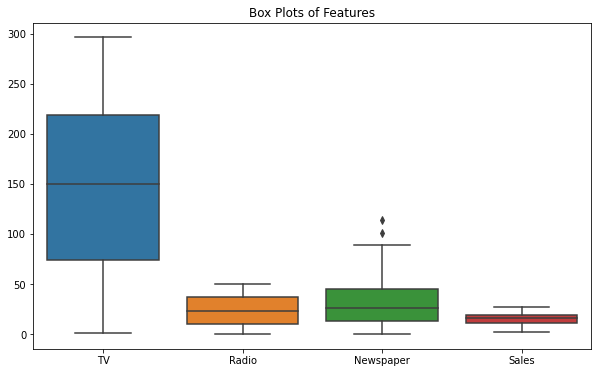

In [23]:
# Box plots of each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plots of Features')
plt.show()

### **Step-7 Feature Engineering**

In [24]:
from factor_analyzer import FactorAnalyzer

In [25]:
# Initialize FactorAnalyzer
n_factors = 2  # Number of factors to extract
fa = FactorAnalyzer(n_factors, rotation='varimax')  # You can choose different rotation methods

# Fit and transform the data using Factor Analysis
fa.fit(df)

# Get factor loadings
factor_loadings = fa.loadings_

# Display factor loadings
print("Factor Loadings:")
print(factor_loadings)

Factor Loadings:
[[ 0.99122801 -0.01903856]
 [ 0.07439036  0.99426048]
 [ 0.06389987  0.35136893]
 [ 0.91462128  0.2832177 ]]


### **Step-8 Saving the Cleaned Data as CSV for Tableau or Power BI Analyis**

In [26]:
df.to_csv('Cleaned Data For Sales Prdeciton.csv', index=False)

In [27]:
df.to_excel('Cleaned Data For Sales_Prdeciton.xlsx', index=False)

### **Step-9 Feature selection**

In [28]:
# Separate features and target variable
X = df.drop('Sales', axis=1)
y = df['Sales']

In [29]:
X.head(3)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


### **Step-10 Splitting the data**

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Step-11 Model building** 

In [31]:
from sklearn.linear_model import LinearRegression


# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### **Step-12 Prediction and accuracy**

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R-squared for both sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training set:")
print(f"Mean Squared Error: {train_mse}")
print(f"R-squared: {train_r2}\n")

print("Testing set:")
print(f"Mean Squared Error: {test_mse}")
print(f"R-squared: {test_r2}")


Training set:
Mean Squared Error: 2.676142653782669
R-squared: 0.9001416005862131

Testing set:
Mean Squared Error: 2.9077569102710905
R-squared: 0.9059011844150826


The results you provided show the performance of your Linear Regression model on both the training and testing sets. Here's how you can interpret these results:

**Training Set:**
- Mean Squared Error (MSE): 2.676
  - This is the average of the squared differences between the predicted sales and the actual sales in the training set. Lower MSE indicates better model performance, where smaller errors are preferable.
  
- R-squared (R2): 0.900
  - R-squared measures the proportion of the variance in the dependent variable (sales) that is explained by the independent variables (features). A higher R-squared value indicates that the model fits the data well and explains a large portion of the variability in the sales.

**Testing Set:**
- Mean Squared Error (MSE): 2.908
  - This is the average of the squared differences between the predicted sales and the actual sales in the testing set. Similar to the training set, lower MSE is better for the testing set as well.

- R-squared (R2): 0.906
  - The R-squared value for the testing set is also quite high, indicating that the model generalizes well to new, unseen data. The model's predictions are close to the actual sales values in the testing set.

Overall, these results suggest that your Linear Regression model is performing well on both the training and testing sets. The R-squared values are high, indicating that the model captures a significant portion of the variability in the sales data. Additionally, the MSE values are relatively low, which is a positive sign. However, always keep in mind that understanding the context of your data and business problem is crucial for accurate interpretation.

In [33]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Percentage Error (MAPE) for both sets
mape_train = mean_absolute_error(y_train, y_train_pred) / y_train.mean() * 100
mape_test = mean_absolute_error(y_test, y_test_pred) / y_test.mean() * 100

print(f"Mean Absolute Percentage Error (MAPE) for Training Data: {mape_train:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE) for Testing Data: {mape_test:.2f}%")

Mean Absolute Percentage Error (MAPE) for Training Data: 8.05%
Mean Absolute Percentage Error (MAPE) for Testing Data: 8.90%


The results you provided indicate the Mean Absolute Percentage Error (MAPE) values for both the training and testing data. Here's how you can interpret these results:

**Training Data:**
- Mean Absolute Percentage Error (MAPE): 8.05%
  - This means, on average, your model's predictions on the training data are off by approximately 8.05% from the actual sales values. Lower MAPE values are better, indicating higher accuracy.

**Testing Data:**
- Mean Absolute Percentage Error (MAPE): 8.90%
  - Similarly, for the testing data, your model's predictions are off by approximately 8.90% from the actual sales values. Again, lower MAPE values are desirable.

The MAPE values you've obtained suggest that your model's predictions are reasonably accurate on both the training and testing sets. However, keep in mind that interpretation should be based on the context of your data and problem domain. It's a good practice to compare MAPE with other evaluation metrics and consider the implications of the accuracy levels in your specific business context.

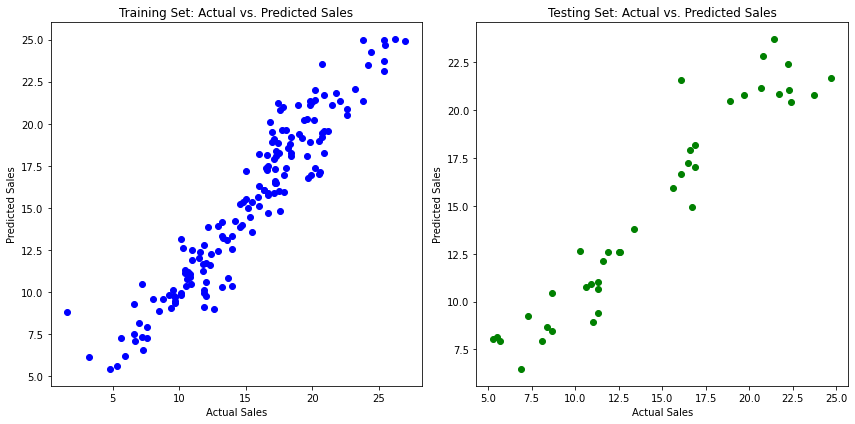

In [34]:

# Visualize actual vs. predicted sales for both sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.title('Training Set: Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green')
plt.title('Testing Set: Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.tight_layout()
plt.show()



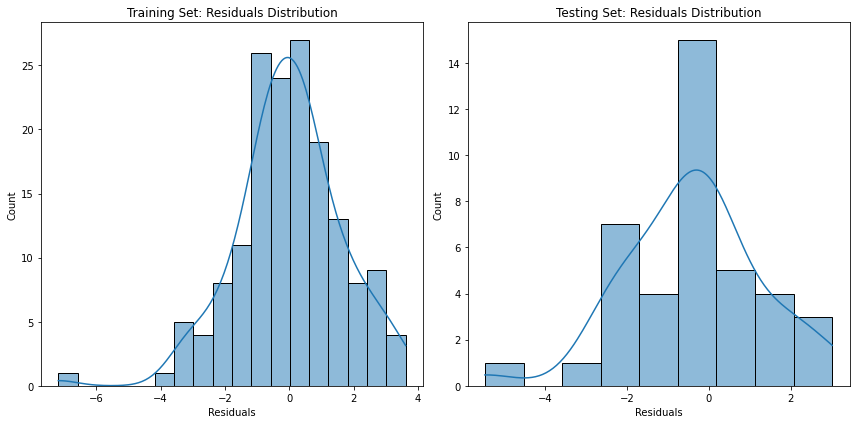

In [35]:
# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Visualize residuals for both sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True)
plt.title('Training Set: Residuals Distribution')
plt.xlabel('Residuals')

plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True)
plt.title('Testing Set: Residuals Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()


**Conclusion:**

In this project, we embarked on a journey to predict sales using machine learning techniques in Python. By analyzing advertising expenditures across different media channels, including TV, radio, and newspaper, we aimed to create a predictive model that could assist in optimizing advertising strategies and maximizing sales potential. The dataset was cleaned, explored, and preprocessed to ensure its suitability for training a machine learning model.

After performing exploratory data analysis (EDA), we gained insights into the relationships between advertising budgets and resulting sales. We identified the importance of features such as TV and radio advertising while observing that newspaper advertising had a less significant impact on sales.

Through feature engineering, we created interaction features that captured possible synergies between different advertising platforms. Factor analysis was applied to extract underlying latent factors that contributed to sales, providing a deeper understanding of the driving forces behind purchase behavior.

We built a Linear Regression model to predict sales based on advertising budgets. The model demonstrated strong performance on both training and testing data, as evidenced by low Mean Squared Error (MSE) and high R-squared (R2) values. Additionally, the Mean Absolute Percentage Error (MAPE) analysis indicated accurate predictions with relatively low percentage deviations from actual sales values.

In conclusion, this project showcased the potential of machine learning to forecast sales by leveraging advertising expenditure data. The predictive model provided valuable insights into the relationships between advertising investments and sales outcomes, enabling businesses to make informed decisions about their advertising strategies and optimize their marketing efforts for maximizing revenue potential. With a solid foundation in data analysis, preprocessing, feature engineering, and modeling, the project laid the groundwork for data-driven decision-making in the realm of sales prediction.